First five rows of the dataset:
   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2    Male   21            15             81
2           3  Female   20            16              6
3           4  Female   23            16             77
4           5  Female   31            17             40


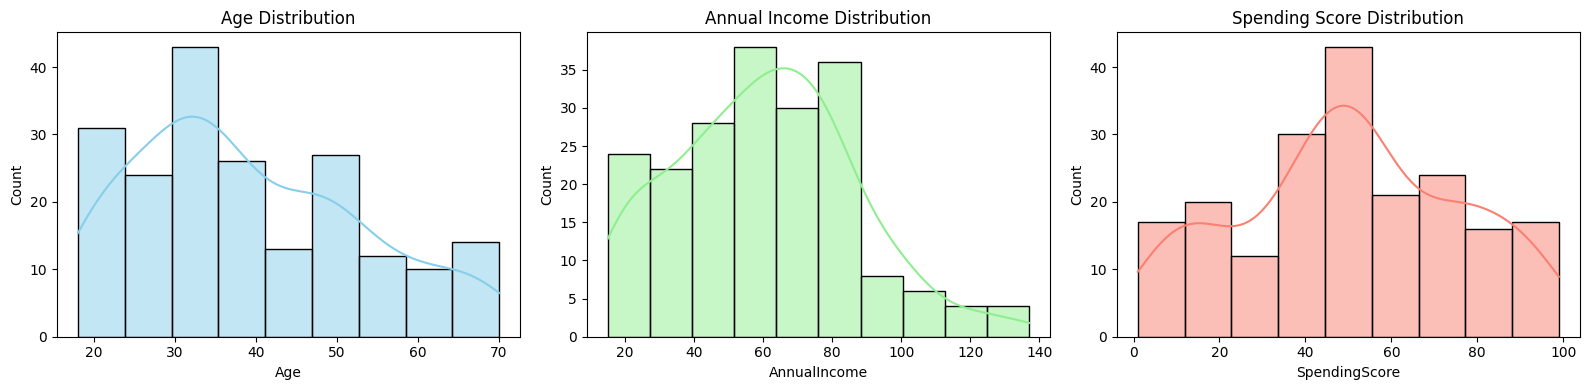

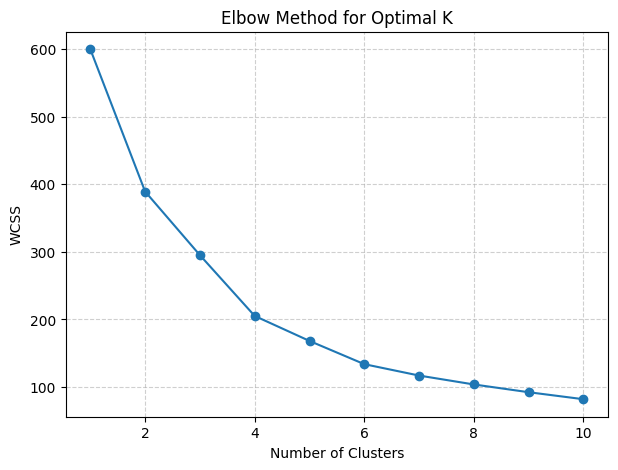

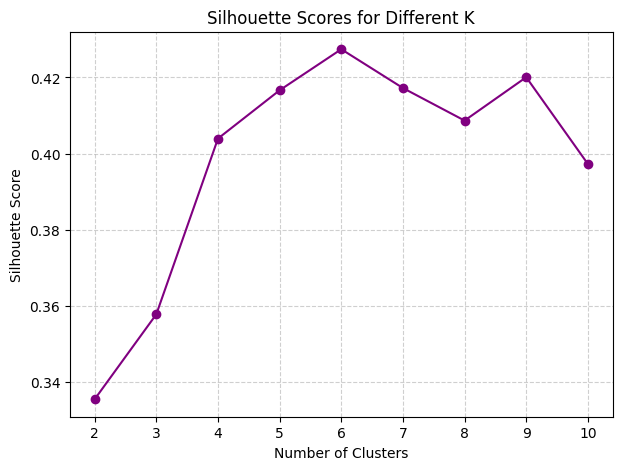

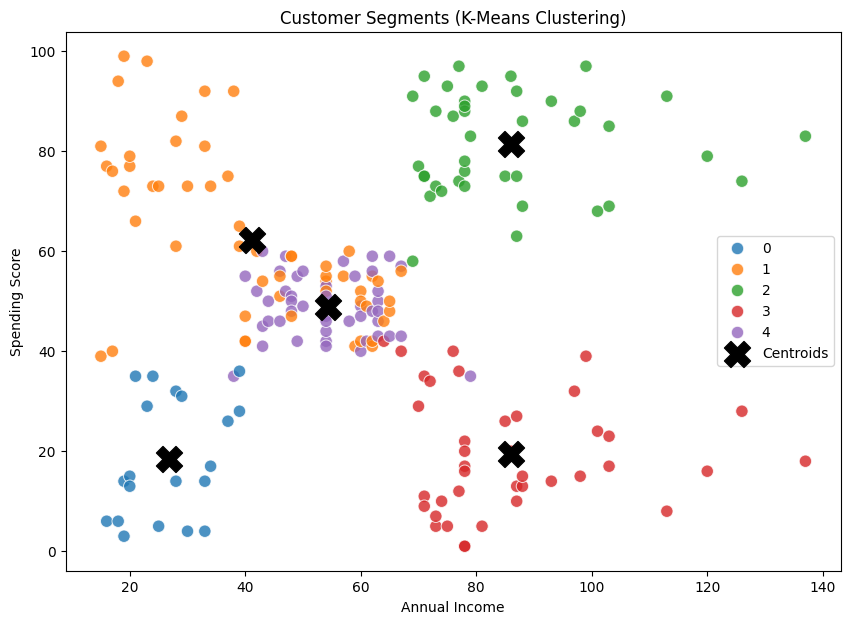


Cluster Profile (mean values):
           Age  AnnualIncome  SpendingScore
Cluster                                    
0        46.25         26.75          18.35
1        25.19         41.09          62.24
2        32.88         86.10          81.53
3        39.87         86.10          19.36
4        55.64         54.38          48.85


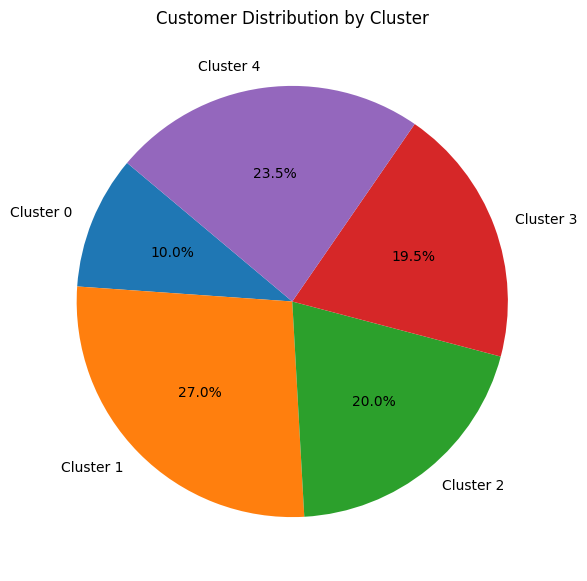


Silhouette Score for 5 clusters: 0.417


In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


data = pd.read_csv('Mall_Customers.csv')
data.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']
print("First five rows of the dataset:")
print(data.head())


plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.subplot(1, 3, 2)
sns.histplot(data['AnnualIncome'], kde=True, color='lightgreen')
plt.title('Annual Income Distribution')
plt.subplot(1, 3, 3)
sns.histplot(data['SpendingScore'], kde=True, color='salmon')
plt.title('Spending Score Distribution')
plt.tight_layout()
plt.show()


data['Gender'] = LabelEncoder().fit_transform(data['Gender'])


features = data[['Age', 'AnnualIncome', 'SpendingScore']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20, max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels))
plt.figure(figsize=(7,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='purple')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=20, max_iter=300, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='AnnualIncome', y='SpendingScore',
    hue='Cluster', data=data, palette='tab10', s=80, alpha=0.8
)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,1], centers[:,2], s=350, c='black', marker='X', label='Centroids')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


profile = data.groupby('Cluster')[['Age', 'AnnualIncome', 'SpendingScore']].mean().round(2)
print("\nCluster Profile (mean values):")
print(profile)


plt.figure(figsize=(7,7))
counts = data['Cluster'].value_counts().sort_index()
plt.pie(counts, labels=[f'Cluster {i}' for i in counts.index], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'))
plt.title('Customer Distribution by Cluster')
plt.show()


final_silhouette = silhouette_score(scaled_features, data['Cluster'])
print(f"\nSilhouette Score for {optimal_k} clusters: {final_silhouette:.3f}")
